<B><h2>Project Title: <i>WHAT DID YOU SAY?!</h2></B></i>

<B>Team Members:</B> Nathan Kotlyn, Taylor Montroy

<B>Competition:</B> Natural Language Processing with Disaster Tweets

<B>Project Link:</B> https://www.kaggle.com/c/nlp-getting-started/overview

# __Introduction__

<h3><B>Project Summary </B></h3>

The use of social media, specifically Twitter, has increasingly become widespread across the globe. Users hundreds of miles apart are connected to eachother, allowing for instant communication. In times of emergency, tweets/posts can be used to spread awareness and communicate the events taking place. With that, organizations are shifting their focuses to programmatically monitoring these sites. However, often times these posts can be ambiguous and it is difficult to interpret whether or not they are comminucating a real emergency. <br><br>

<i><B>Our goal is to build an optimal machine learning model to determine which tweets are about real emergencies and which ones aren't.</i></B>

<br><h3><B>Data Summary</h3></B>

The data is 10,000 observations which include tweet information, such as: tweet id, tweet text, location, tweet keyword, and a target variable (a '0' or '1' and only included in train dataset). 

<B>train.csv <i>(file)</i></b>
- <b>id</b> - a unique identifier for each tweet
- <b>text</b> - the text of the tweet
- <b>location</b> - the location the tweet was sent from (may be blank)
- <b>keyword</b> - a particular keyword from the tweet (may be blank)
- <b>target</b> - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

<b>train.csv <i>(file)</i></b>
- <b>id</b> - a unique identifier for each tweet
- <b>text</b> - the text of the tweet
- <b>location</b> - the location the tweet was sent from (may be blank)
- <b>keyword</b> - a particular keyword from the tweet (may be blank)

<br><h3><B>Project Objective</h3></B>

Our objective is to use text mining (regualr expressions and topic modeling) to build a Neural Net Classifier, Logistic Regression, and a Support Vector Machine. We will pre-process the data, build a term document matrix, and run it through our classifiers.

# __Exploratory Analysis Stage (EDA)__

<h3><B>Importing Data & Libaries</h3></B>

In [2]:
# Importing necessary libriariesa
import io
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
# from wordcloud import WordCloud
nltk.download('stopwords')
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
from pandas import get_dummies
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score, f1_score, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tmontroy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
# Importing data sets
# uploaded = files.upload()
# train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
# uploaded = files.upload()
# test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

train_filePath = 'train.csv'
test_filePath = 'test.csv'
train = pd.read_csv(train_filePath)
test = pd.read_csv(test_filePath)

NameError: name 'pd' is not defined

<h3><B>Summary Statistics</h3></B>

In [3]:
# Initial viewing of training dataset
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
# Initial viewing of testing dataset
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
# Shape of both datasets, how many rows are we working with?
test.shape, train.shape

((3263, 4), (7613, 5))

In [6]:
# What exactly are we working with?
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
# What exactly are we working with?
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [8]:
# More info on our datasets
train.describe(include = 'all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [9]:
# More info on our datasets
train.describe(include = 'all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [10]:
# How many tweets are classified as disaster/non-disaster?
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

<h3><B>Visualizations</h3></B>

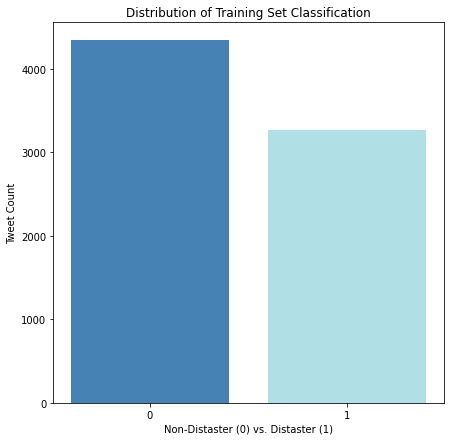

In [11]:
# Bar chart of training set classification distribution
x = ['0','1']
y = np.array(train.target.value_counts())

fig = plt.figure(figsize = (7,7))
ax1 = fig.add_subplot()
ax1.bar(x,y, color=['steelblue', 'powderblue'])
ax1.set_xlabel('Non-Distaster (0) vs. Distaster (1)')
ax1.set_ylabel('Tweet Count')
ax1.set_title('Distribution of Training Set Classification');

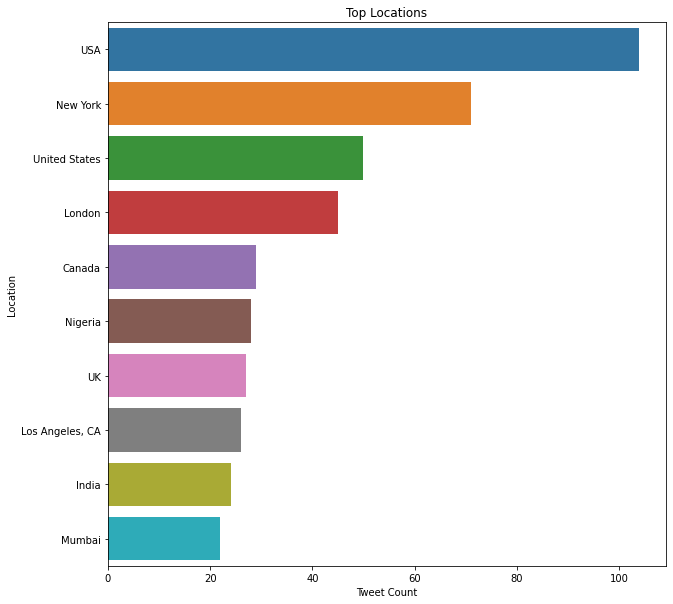

In [12]:
# Countplot of the top tweet locations
# We can see USA is listed twice, first as 'USA' and second as 'United States'
# We can also see there is a mix of countries and states as locations
# Can we conclude that location is meaningless?
fig2 = plt.figure(figsize = (10,10))
fig2 = sns.countplot(y = train.location, order = train.location.value_counts().iloc[:10].index)
fig2.set_ylabel('Location')
fig2.set_xlabel('Tweet Count')
fig2.set_title('Top Locations');

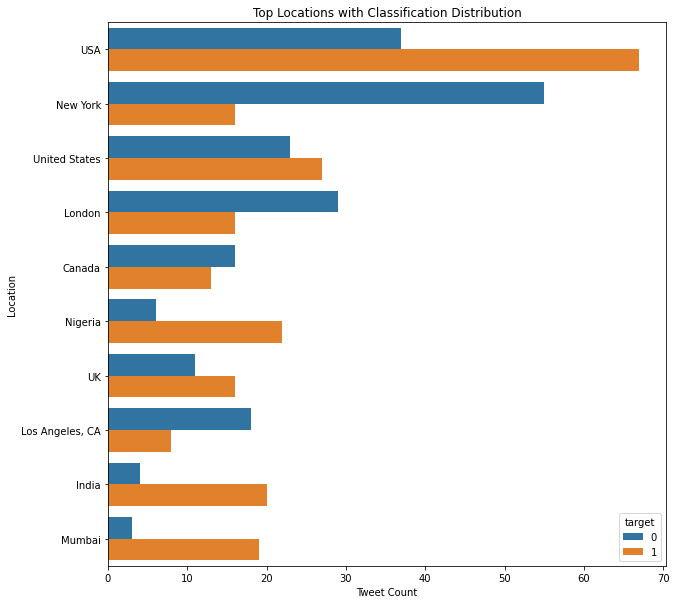

In [13]:
# Countplot of top tweet locations with classification labels
fig3 = plt.figure(figsize = (10,10))
fig3 = sns.countplot(y = train.location, hue = train.target, order = train.location.value_counts().iloc[:10].index)
fig3.set_ylabel('Location')
fig3.set_xlabel('Tweet Count')
fig3.set_title('Top Locations with Classification Distribution');

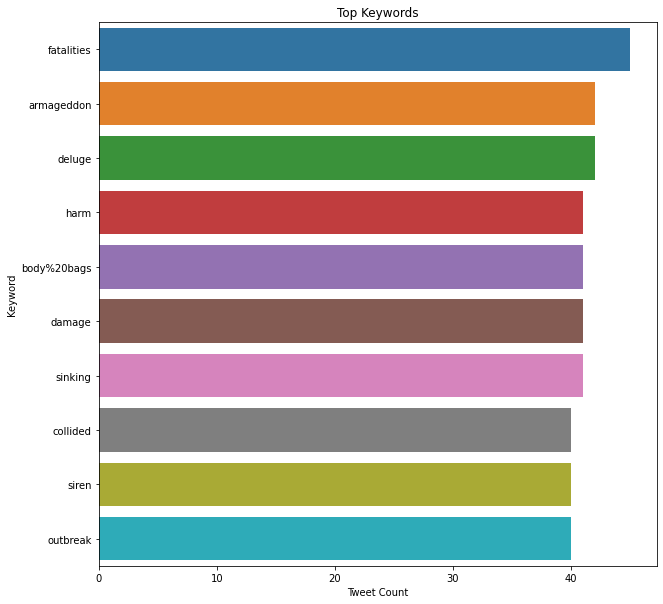

In [14]:
# Countplot of top keywords
# This doesn't show us the distribution of classification labels, however
fig3 = plt.figure(figsize = (10,10))
fig3 = sns.countplot(y = train.keyword, order = train.keyword.value_counts().iloc[:10].index)
fig3.set_ylabel('Keyword')
fig3.set_xlabel('Tweet Count')
fig3.set_title('Top Keywords');

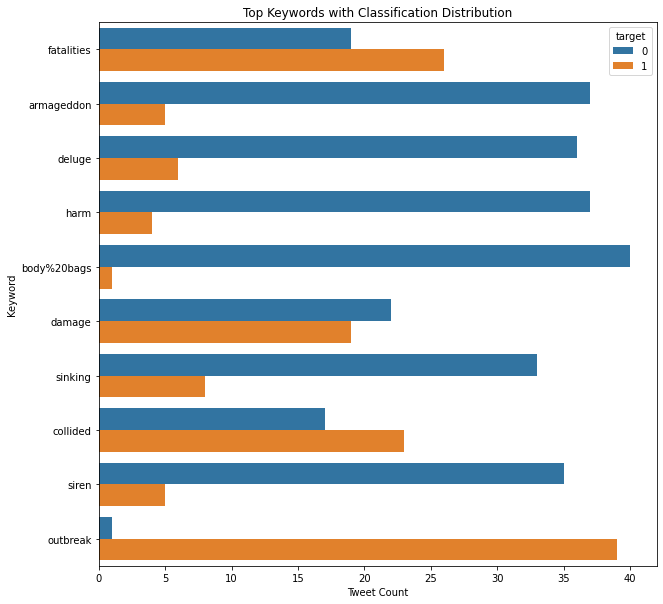

In [15]:
# Countplot of top keywords with classification labels
# We can see some words like 'armageddon' or 'harm' are actually more prominent in 'non-disaster tweets'
fig3 = plt.figure(figsize = (10,10))
fig3 = sns.countplot(y = train.keyword, hue = train.target, order = train.keyword.value_counts().iloc[:10].index)
fig3.set_ylabel('Keyword')
fig3.set_xlabel('Tweet Count')
fig3.set_title('Top Keywords with Classification Distribution');

<h3><B>Interesting Findings</h3></B>

<i>Distribution of Classification Labels:</i><br>
In the training dataset, we can see that there is a somewhat fair distribution of the target labels (i.e., classification of tweets). There are about 4300 tweets classified as 'non-distaster' and about 3200 tweets classified as 'disaster.' This distribution of training set labels shows that we can use the dataset for building out model(s) as it isn't heavily skewed. 

<br><i>Findings on Locations:</i><br>
We can also see that the location of the tweet does not matter to use. There is a mixture of both cities, states, and nations in the location column. For example, some tweets are located in 'USA' while others are more specifically labelled in 'Los Angeles, CA.' Also, there is the duplication of country names like 'USA' and 'United States.'

<br><i>Findings on Keywords:</i><br>
Looking at the distribution of the keywords, we find that some words such as armageddon, siren, harm, and fear are more commonly found in the tweets classified as 'non-distaster.' This could be considered opposite of what we think we should find.

<br><B>With our basic exploratory findings, it is clear that we should not use location or keyword in our models. They provide no-real indication on whether a tweet would be classified as a disaster or not. Thinking ahead, we are planning to use a document term matrix in our models, so the keywords and locations would be of no use to us.</B>


# __Data Preparation & Pre-Processing__

In [16]:
# Add labels to training and testing sets first so that we can split them back up later
train['label'] = 'Train'
test['label'] = 'Test'

# Dropping the location and keyword column since they are of no use to us
train.drop(columns = ['location','keyword'], axis = 1, inplace = True)
test.drop(columns = ['location','keyword'], axis = 1, inplace = True)

# Combining test and train datasets to build a document term matrix with all possible terms
df = pd.concat([train,test], axis = 0, ignore_index = True )
df.drop(columns = ['target'], axis = 1, inplace = True)

In [17]:
# Making sure the steps above worked
print('Test Shape:', test.shape)
print('Train Shape:', train.shape)
print('Merged - df Shape:', df.shape)
df.head()
#df[df['label'] == 'Test']

Test Shape: (3263, 3)
Train Shape: (7613, 4)
Merged - df Shape: (10876, 3)


,id,text,label
0,1,Our Deeds are the Reason of this #earthquake M...,Train
1,4,Forest fire near La Ronge Sask. Canada,Train
2,5,All residents asked to 'shelter in place' are ...,Train
3,6,"13,000 people receive #wildfires evacuation or...",Train
4,7,Just got sent this photo from Ruby #Alaska as ...,Train


In [18]:
# Get Rid of Usernames
pat = r'@\S+\w'
regexp = re.compile(pat, re.IGNORECASE)
temp_text = []
for tweet in df['text']:
    s = re.sub(pat, '',tweet)
    temp_text.append(s)
    
df['text'] = temp_text

In [19]:
# Get rid of numbers and special characters
pat = r"[0-9\~\`\!\$\%\^\&\*\(\)\[\]\-\_\+\=\\{\}\|\:\'\;\"\<\>\?\,\.\/\#]"
regexp = re.compile(pat, re.IGNORECASE)
temp_text = []
for tweet in df['text']:
    s = re.sub(pat, '',tweet)
    temp_text.append(s)
    
df['text'] = temp_text

In [20]:
# Get rid of hyperlinks
pat = r'https?\S+\w'
regexp = re.compile(pat)
temp_text = []
for tweet in df['text']:
    s = re.sub(pat, '',tweet)
    temp_text.append(s)
    
df['text'] = temp_text

In [21]:
# Do our removals work?
df.head()
#df[df['label'] == 'Test']

,id,text,label
0,1,Our Deeds are the Reason of this earthquake Ma...,Train
1,4,Forest fire near La Ronge Sask Canada,Train
2,5,All residents asked to shelter in place are be...,Train
3,6,people receive wildfires evacuation orders in...,Train
4,7,Just got sent this photo from Ruby Alaska as s...,Train


In [22]:
# Add our cleaned_text back into original training/testing data to use the labels
train['cleaned_text'] = df[df['label'] == 'Train']['text']
test['cleaned_text'] = np.array(df[df['label'] == 'Test']['text'])

In [23]:
# How does our train dataset look now?
train.head()

,id,text,target,label,cleaned_text
0,1,Our Deeds are the Reason of this #earthquake M...,1,Train,Our Deeds are the Reason of this earthquake Ma...
1,4,Forest fire near La Ronge Sask. Canada,1,Train,Forest fire near La Ronge Sask Canada
2,5,All residents asked to 'shelter in place' are ...,1,Train,All residents asked to shelter in place are be...
3,6,"13,000 people receive #wildfires evacuation or...",1,Train,people receive wildfires evacuation orders in...
4,7,Just got sent this photo from Ruby #Alaska as ...,1,Train,Just got sent this photo from Ruby Alaska as s...


In [24]:
# How does our test dataset look now?
test.head()

,id,text,label,cleaned_text
0,0,Just happened a terrible car crash,Test,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s...",Test,Heard about earthquake is different cities sta...
2,3,"there is a forest fire at spot pond, geese are...",Test,there is a forest fire at spot pond geese are ...
3,9,Apocalypse lighting. #Spokane #wildfires,Test,Apocalypse lighting Spokane wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan,Test,Typhoon Soudelor kills in China and Taiwan


<h3><B> More Visualizations After Pre-processing</h3></B>

In [25]:
#sss = Stem Stop Strip function for our word clouds below
def sss_Cleaner(doc):
    stopWords = stopwords.words('english')
    return ' '.join([word.lower() for word in doc.split() if word not in stopWords and word.isalpha() and len(word) > 3])

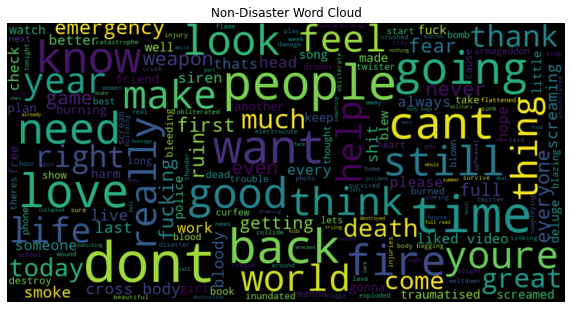

In [28]:
# WordCloud of tweets classified as 'Non-Disasters'
# wordcloud help datacamp.com/community/tutorials/wordcloud-python
nondisaster_words = ' '.join([sss_Cleaner(word) for word in train['cleaned_text'][train['target'] == 0]])
wcloud = WordCloud(width = 1000, height = 500, random_state = 11, max_font_size = 100).generate(nondisaster_words)
plt.figure(figsize = (10,10))
plt.imshow(wcloud, interpolation = 'bilinear')
plt.title('Non-Disaster Word Cloud')
plt.axis('off')
plt.show()

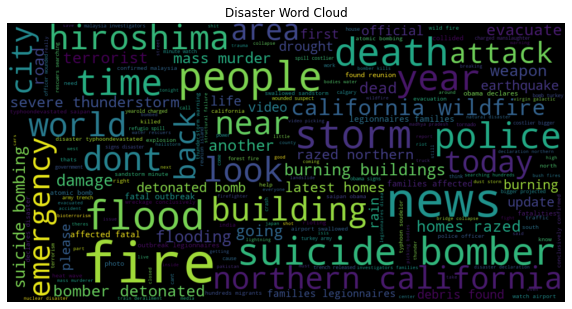

In [29]:
# WordCloud of tweets classified as 'Non-Disasters'
# wordcloud help datacamp.com/community/tutorials/wordcloud-python
disaster_words = ' '.join([sss_Cleaner(word) for word in train['cleaned_text'][train['target'] == 1]])
cloud = WordCloud(width = 1000, height = 500, random_state = 11, max_font_size = 100).generate(disaster_words)
plt.figure(figsize = (10,10))
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Disaster Word Cloud')
plt.show()

# __Modeling__

<h3><B>Building a Document Term Matrix<h3><B>

In [30]:
# Stemmer for our matrix
stopWords = stopwords.words('english')
anaylzer = TfidfVectorizer().build_analyzer()
def stemmedStoppedStripped(doc):
    return [word.lower() for word in anaylzer(doc) if word not in stopWords and word.isalpha() and len(word) > 3]

In [31]:
# Making sure our df (merged) dataframe is set for our matrix
df.columns

Index(['id', 'text', 'label'], dtype='object')

In [32]:
# Building and viewing our matrix
tf_IDF_obj = TfidfVectorizer(min_df = 5, max_df = .8, analyzer = stemmedStoppedStripped)
doc_term = tf_IDF_obj.fit(df['text'])
doc_term = tf_IDF_obj.transform(df['text'])
doc_term_df = pd.DataFrame(doc_term.toarray(), columns = tf_IDF_obj.get_feature_names())
doc_term_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandoned,abbswinston,ability,ablaze,able,abomb,absolute,absolutely,abstorm,abuse,access,accident,accidentally,accidents,according,account,accounts,accused,accuses,acid,acres,across,acting,action,actions,activated,activates,active,activity,acts,actual,actually,added,address,admits,adult,advance,advisory,affected,affecting,...,wrecked,write,writer,writing,written,wrong,wrought,wwii,xbox,yahoo,yall,yard,yazidis,yeah,year,yearold,years,yemen,yesterday,yesterdays,york,yorker,youd,youll,young,youre,youth,youtube,youve,yycstorm,zayn,zero,zionist,zombie,zone,zouma,ûªre,ûªve,ûïwe,ûïwhen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.395521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Re-split Data into training and testing set
doc_term_df['label'] = df['label']
X_train = doc_term_df[doc_term_df['label'] == 'Train']
y_train = train['target']
X_test = doc_term_df[doc_term_df['label'] == 'Test']

X_train.drop(columns = ['label'], axis = 1, inplace = True)
X_test.drop(columns = ['label'], axis = 1, inplace = True)

X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
# Verify our dataframe shapes
X_test.shape, X_train.shape, y_train.shape

((3263, 2985), (7613, 2985), (7613,))

<h3><B>Neural Network Model</h3></B>

In [35]:
# Define the  network object 
network = models.Sequential()

# Created the first hidden layer and input layer 
nodesNum = len(doc_term_df.columns) - 1
network.add(layers.Dense(units = nodesNum, activation = 'relu', input_shape = (nodesNum,)))

# Created the second hidden layer  
network.add(layers.Dense(units = nodesNum, activation = 'relu'))

# Created the Third hidden layer  
network.add(layers.Dense(units = nodesNum, activation = 'relu'))

# Created the output layer  
output_act = 'sigmoid'
output_nodes = 1
network.add(layers.Dense(output_nodes, activation = output_act))

# Viewing our network's summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2985)              8913210   
                                                                 
 dense_1 (Dense)             (None, 2985)              8913210   
                                                                 
 dense_2 (Dense)             (None, 2985)              8913210   
                                                                 
 dense_3 (Dense)             (None, 1)                 2986      
                                                                 
Total params: 26,742,616
Trainable params: 26,742,616
Non-trainable params: 0
_________________________________________________________________


In [36]:
#Defines the loss and optimization funcitons
loss_func = 'binary_crossentropy'
optimize = 'Adam'

#Compile the network to be able to be trained on training set
network.compile(optimizer = optimize, loss = loss_func, metrics = ['accuracy', 'AUC'])

In [37]:
#Number of epochs and batch size
e = 5
b_s = 800

#Train the model on training set to  3 epoch and batch size 512
results = network.fit(x = X_train, y = y_train, epochs = e, batch_size = b_s)

Epoch 1/5
10/10 [==============================] - 20s 2s/step - loss: 0.6759 - accuracy: 0.5715 - auc: 0.5716
Epoch 2/5
10/10 [==============================] - 19s 2s/step - loss: 0.4492 - accuracy: 0.8136 - auc: 0.8810
Epoch 3/5
10/10 [==============================] - 19s 2s/step - loss: 0.2400 - accuracy: 0.9065 - auc: 0.9635
Epoch 4/5
10/10 [==============================] - 19s 2s/step - loss: 0.1461 - accuracy: 0.9442 - auc: 0.9866
Epoch 5/5
10/10 [==============================] - 19s 2s/step - loss: 0.1073 - accuracy: 0.9586 - auc: 0.9915


In [103]:
# Generate Labels for competition submission, since NN generates labels between 1 and 0
prediction_labels = network.predict(X_test)
threshold = .5

result_labels = []
for label in prediction_labels:
  if label >= threshold:
    result_labels.append(1)
  else:
    result_labels.append(0)
    
NN_labels = result_labels

In [109]:
# Place our predicted-results back into the testing set
test['NN_target'] = result_labels
resultsNN = test.loc[:,['id','NN_target']]
resultsNN.to_csv('NN_results.csv',)
resultsNN.head()

,id,NN_target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


<h3><B>Logistic Regression</h3></B>

In [40]:
# Building our LR model
LR_clf = LogisticRegression(random_state=0)
LR_clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [110]:
# Place our predicted results back into the testing set and view them
log_labels = LR_clf.predict(X_test)
test['log_target'] = log_labels
resultsLR = test.loc[:,['id','log_target']]
resultsLR.to_csv('LR_results.csv',)
resultsLR.head()

,id,log_target
0,0,1.0
1,2,1.0
2,3,1.0
3,9,1.0
4,11,1.0


<h3><B>Support Vector Model (SVM)</h3></B>

In [42]:
# Building our SVM model
SVC_clf = svm.SVC()
SVC_clf.fit(X_train, y_train)

SVC()

In [ ]:
# Place our predicted results back into the testing set and view them
SVC_labels = SVC_clf.predict(X_test)
test['SVC_target'] = SVC_labels
resultsSVC = test.loc[:,['id','SVC_target']]
resultsSVC.to_csv('SVC_results.csv',)
resultsSVC.head()

# __Performance Evaluation__

<h3><B>Model Evaluation with TrainTestSplit</h3></B>

Here, we intend to evaulate the performance of our models with a validation dataset. That is, we are splitting our training dataset (80/20) with the TrainTestSplit method and seeing how well our models perform by using a testing set with labels.

<i>Below is a AUC graph of our models as well a confusion for each.</i>

<B>TrainTestSplit Method</B>


In [44]:
X_trainSPLIT, X_testSPLIT, y_trainSPLIT, y_testSPLIT = train_test_split(X_train, y_train, test_size = 0.20, random_state = 11)

<B>ROC Curve Evaluation</B>

In [45]:
# Re-running our models with our training dataset split with TrainTestSplit
# Re-running the Neural Network
resSPLIT = network.fit(x = X_trainSPLIT, y = y_trainSPLIT, epochs = e, batch_size = b_s)
NN_SPLIT = network.predict(X_testSPLIT)

# Re-running the Logistic Regression
LR_clf.fit(X_trainSPLIT, y_trainSPLIT)
log_SPLIT = LR_clf.predict(X_testSPLIT)

# Re-running the SVC
SVC_clf.fit(X_trainSPLIT, y_trainSPLIT)
SVC_SPLIT = SVC_clf.predict(X_testSPLIT)

Epoch 1/5
8/8 [==============================] - 16s 2s/step - loss: 0.0814 - accuracy: 0.9670 - auc: 0.9956
Epoch 2/5
8/8 [==============================] - 16s 2s/step - loss: 0.0739 - accuracy: 0.9704 - auc: 0.9963
Epoch 3/5
8/8 [==============================] - 16s 2s/step - loss: 0.0632 - accuracy: 0.9708 - auc: 0.9974
Epoch 4/5
8/8 [==============================] - 16s 2s/step - loss: 0.0621 - accuracy: 0.9729 - auc: 0.9974
Epoch 5/5
8/8 [==============================] - 15s 2s/step - loss: 0.0577 - accuracy: 0.9726 - auc: 0.9977


In [54]:
# Grabbing the false-positive rates, the recalls, and the thresholds to find the AUC
# Neural Network ROC-Curve
NN_fpr, NN_tpr, NN_thresholds = roc_curve(y_testSPLIT, NN_SPLIT)
NN_AUC = auc(NN_fpr, NN_tpr)

# Logistic Regression ROC-Curve
log_fpr, log_tpr, log_thresholds = roc_curve(y_testSPLIT, log_SPLIT)
LR_AUC = auc(log_fpr, log_tpr)

# Support Vector Classifier
SVC_fpr, SVC_tpr, SVC_thresholds = roc_curve(y_testSPLIT, SVC_SPLIT)
SVC_AUC = auc(SVC_fpr, SVC_tpr)

In [93]:
# Plotting the ROC Curves with the AUC Scores
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  

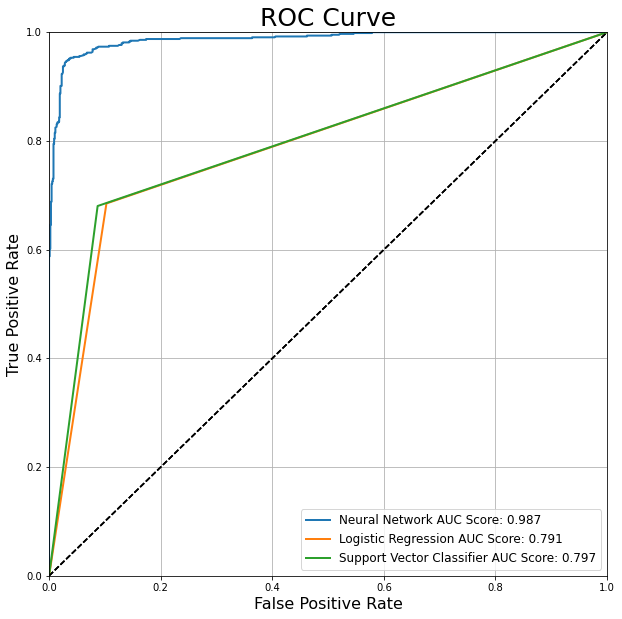

In [73]:
# Plotting the ROC Curves with the AUC Scores
fig5 = plt.figure(figsize=(10, 10))
ax1 = fig5.add_subplot()
ax1 = plt.title("ROC Curve", fontsize=25)
ax1 = plt.axis([0, 1, 0, 1])
ax1 = plt.grid(True) #shows grid lines
ax1 = plt.xlabel('False Positive Rate', fontsize=16)
ax1 = plt.ylabel('True Positive Rate', fontsize=16)
ax1 = plot_roc_curve(NN_fpr, NN_tpr, 'Neural Network AUC Score: 0.987')
ax1 = plot_roc_curve(log_fpr, log_tpr, 'Logistic Regression AUC Score: 0.791')
ax1 = plot_roc_curve(SVC_fpr, SVC_tpr, 'Support Vector Classifier AUC Score: 0.797')
ax1 = plt.legend(fontsize = 12)

<B>Confusion Matrix Evaluation</B>


In [88]:
# Generate Labels, since NN generates labels between 1 and 0
res_labels = []
for label in NN_SPLIT:
  if label >= threshold:
    res_labels.append(1)
  else:
    res_labels.append(0)

NN_SPLIT = np.array(res_labels)

In [82]:
# Neural Network confusion matrix
confusion_matrix(y_testSPLIT, NN_SPLIT)

array([[861,  24],
       [ 40, 598]])

In [83]:
# Logistic Regression confusion matrix
confusion_matrix(y_testSPLIT, log_SPLIT)

array([[794,  91],
       [201, 437]])

In [84]:
# Support Vector Classifier confusion matrix
confusion_matrix(y_testSPLIT, SVC_SPLIT)

array([[808,  77],
       [204, 434]])

<h3><B>Model Evaluation with Correct Testing Labels</h3></B>

After some research, it has come to our attention that there is a dataset with the correct answers published online. This is the dataset Kaggle for their contest submission accuracy scores (because of this, many people have submitted to the competition using this dataset to earn a perfect score).

<br><B>We intended to use this dataset <i>ONLY</i> to check our models' accuracy scores.</B>

In [95]:
uploaded = files.upload()
perfect = pd.read_csv(io.BytesIO(uploaded['perfect_submission.csv']))

Saving perfect_submission.csv to perfect_submission.csv


<B>Model Accuracy with Perfect Testing Labels</B>


In [96]:
# Accuracy of our Neural Network
count = 0
for k in range(0, len(prediction_labels)):
  if resultsNN.loc[k, 'NN_target'] == perfect.loc[k,'target']:
    count += 1

NN_Score = count/len(prediction_labels)
print('Accuracy Score of our Neural Network:', NN_Score)

Accuracy Score of our Neural Network: 0.7704566349984676


In [97]:
# Accuracy of our Logistic Regression
count = 0
for k in range(0, len(prediction_labels)):
  if resultsLR.loc[k, 'log_target'] == perfect.loc[k,'target']:
    count += 1

LR_Score = count/len(prediction_labels)
print('Accuracy Score of our Logistic Regression:', LR_Score)

Accuracy Score of our Logistic Regression: 0.7989580140974564


In [98]:
# Accuracy of our SVC
count = 0
for k in range(0, len(prediction_labels)):
  if resultsSVC.loc[k, 'SVC_target'] == perfect.loc[k,'target']:
    count += 1

SVC_Score = count/len(prediction_labels)
print('Accuracy Score of our SVC:', SVC_Score)

Accuracy Score of our SVC: 0.8001838798651547


<h3><B>Results Summary</h3></B>

<B>Summary of Model Evaluation with TrainTestSplit</B>
<br><i>Below is a list of the AUC scores we achieved on our models:</i><br>

- Neural Network: <b>98.70%</b>
- Logistic Regression: <b>79.10%</b>
- SVC: <b>79.70%</b>

<br>The ROC Curve graph shows us that the Neural Net model performs the best (compared the the LR and SVC) in minimizing false negatives and maximizing true positives. We can conclude this as it has the largest area under the curve (AUC) score, which means it is the best at correctly separating the classes.

<br><B>Summary of Model Evaluation with Correct Testing Labels</B>
<br><i>Below is a list of the accuracy scores we achieved on our models:</i><br>

- Neural Network: <b>76.86%</b>
- Logistic Regression: <b>79.90%</b>
- SVC: <b>80.02%</b>

<br>Looking at accuracy scores <i>ONLY</i>, we can see that the SVC model performed better than the other two.

<br><B>FINAL INTERPRETATION</B>
<br>After our analyses, we can see that even though the SVC has the highest accuracy it is not the best at separating the classes. The Neural Network outperforms each model when it comes to determining true positives and negatives. Because the Neural Network only slightly underperforms in terms of accuracy, we would still choose to implement it in classifying disaster tweets in a real world context.

<br><B>Our goal was to build an optimal machine learning model to correctly classify disaster tweets, and we are confident that the Neural Network is the best model for the objective.</B>

<br><i>*AUC - ROC curve measures how capable a model is at distinguishing between classes. As in, the greater the AUC score, the better the model is at prediction '0' classes as '0' and '1' classes as '1.'</i>
